In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
df = pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.


In [3]:
df.shape

(158, 12)

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## nullvalues visualization using heatmap

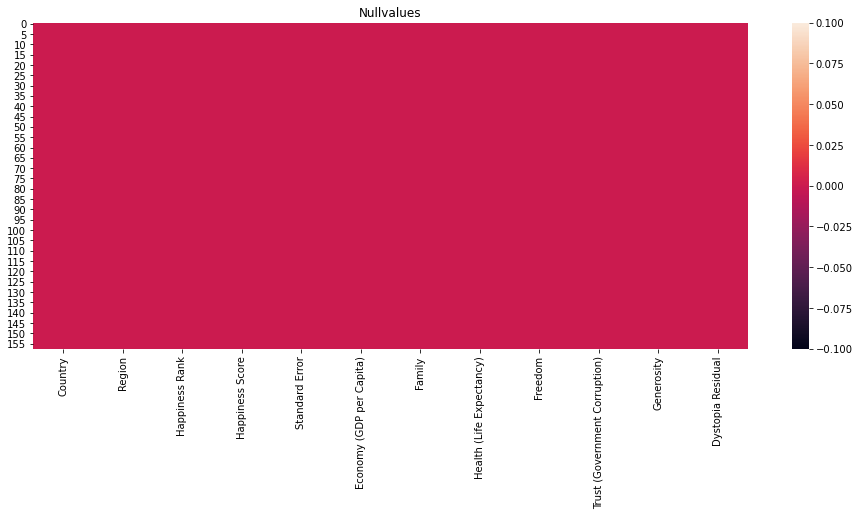

In [9]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

In [11]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

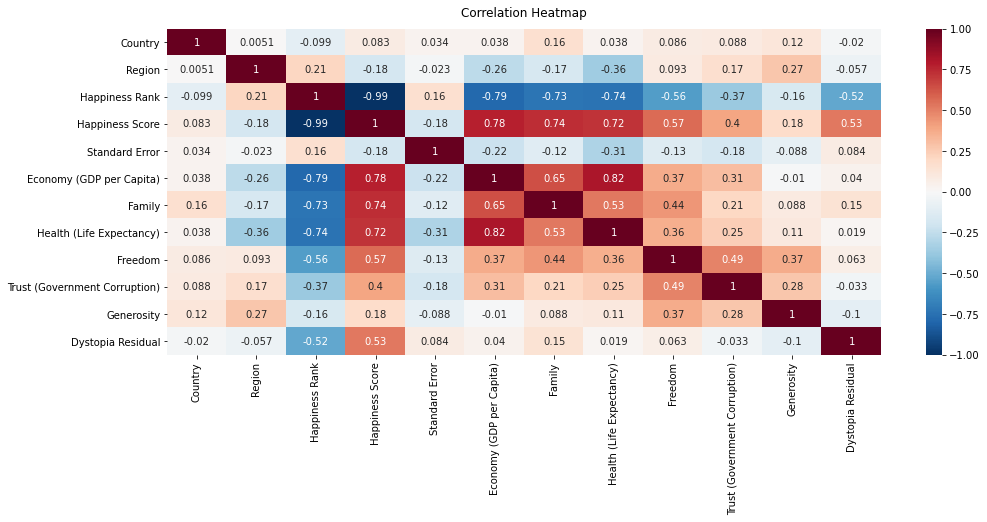

In [210]:
plt.figure(figsize = (16, 6))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap='RdBu_r', annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 12}, pad = 12)

### Happiness score is highly correlated with Economy,Family,Health,Freedom and least correlated with Genorisity,Trust

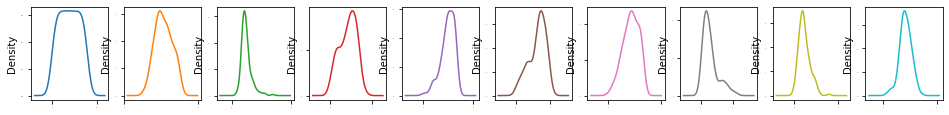

In [13]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

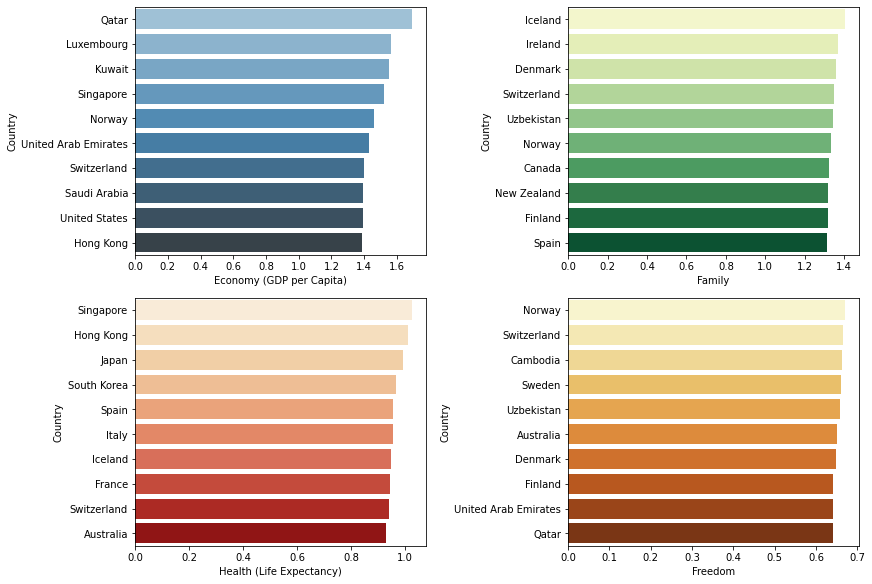

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Family',y='Country',data=df.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)',y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom',y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Country'>

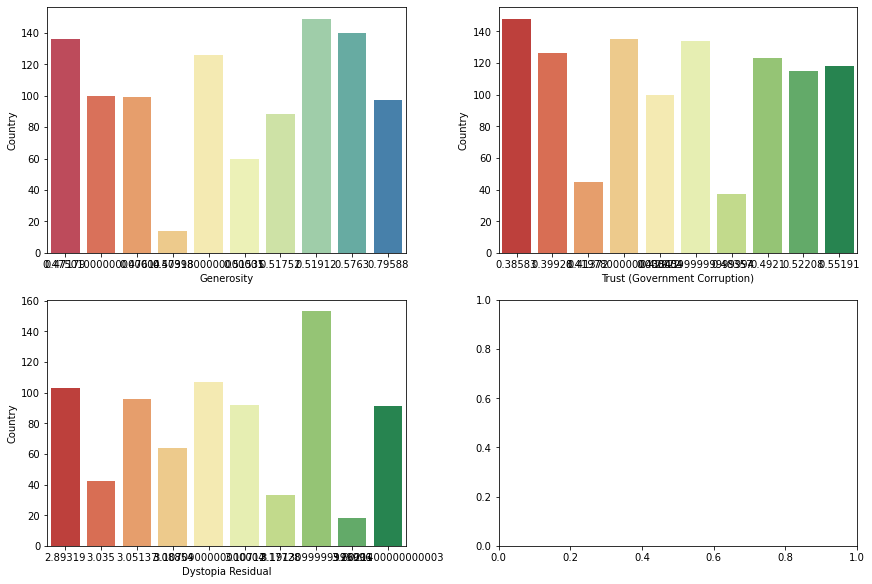

In [212]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Generosity',y='Country',data=df.nlargest(10,'Generosity'),ax=axes[0,0],palette='Spectral')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',data=df.nlargest(10,'Trust (Government Corruption)'),ax=axes[0,1],palette='RdYlGn')
sns.barplot(x='Dystopia Residual' ,y='Country',data=df.nlargest(10,'Dystopia Residual'),ax=axes[1,0],palette='RdYlGn')

## label encoder

In [213]:
le = preprocessing.LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['Country'] = le.fit_transform(df['Country'])
        

In [214]:
x=df.drop('Happiness Score',axis=1)
y=df["Happiness Score"]

In [17]:
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45,9,6,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99,9,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134,9,8,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100,0,9,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6,0,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [18]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
27     6.611
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
33     6.455
34     6.411
35     6.329
36     6.302
37     6.298
38     6.295
39     6.269
40     6.168
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
64     5.709
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
73     5.399
74     5.360
75     5.332
76     5.286

# checking the skewness

In [19]:
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [20]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [21]:
df_new.skew()

Country                         -0.279791
Region                          -0.228041
Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

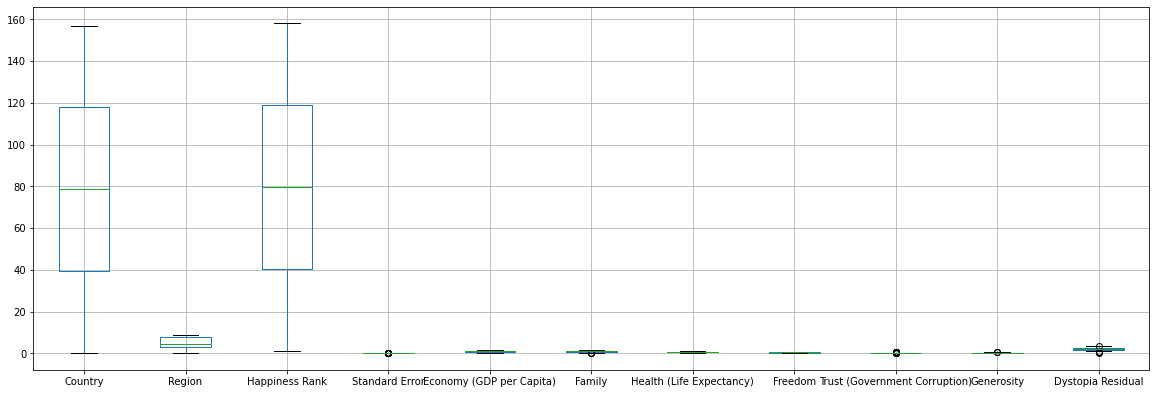

In [25]:
#boxplot
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

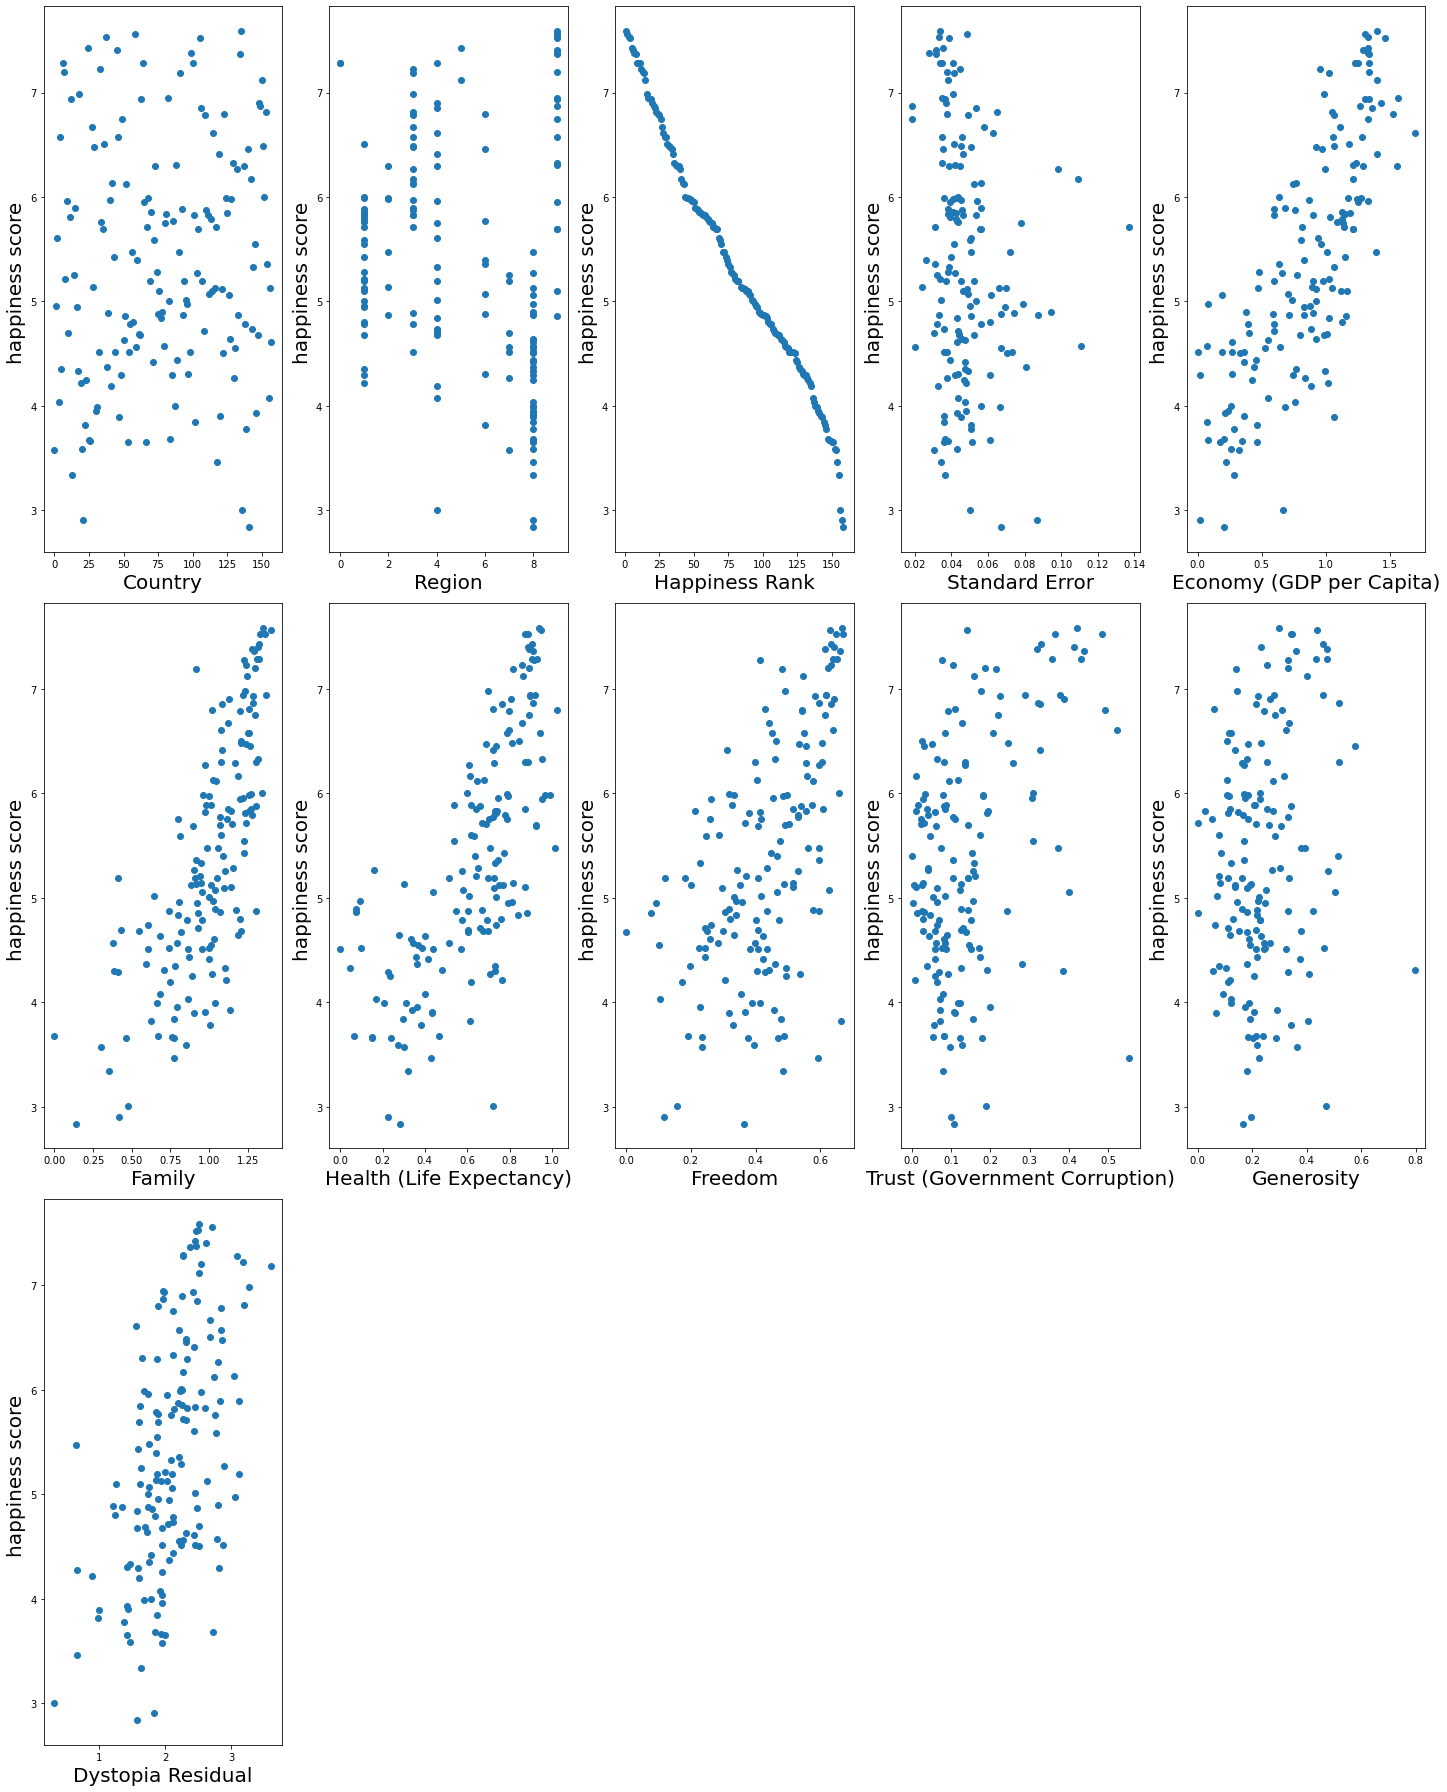

In [26]:
#scatter plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('happiness score ',fontsize=20)
    plotnumber+=1
plt.tight_layout()
        

In [27]:
#data scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [28]:
x_scaled

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-0.44946522,  1.30025593, -1.69907456, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.90989302,  1.30025593, -1.67714922, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-1.26069514,  0.96511655,  1.69935209, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [29]:
#splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train.head()

54     5.848
18     6.937
95     4.949
149    3.656
4      7.427
Name: Happiness Score, dtype: float64

# Linear Regression model training 

In [30]:
# model instantiating and training
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45,9,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134,9,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100,0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [32]:
print('Happiness score :',regression.predict(scaler.transform([[6,0,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646]])))

Happiness score : [7.28411685]


In [33]:
#adjuasted r*2
regression.score(x_train,y_train)


0.9999999504662587

In [34]:
regression.score(x_test,y_test)

0.9999999083638639

In [35]:
y_pred = regression.predict(x_test)

In [36]:
y_pred

array([7.58674027, 3.98874828, 5.42863825, 4.87431394, 4.69398367,
       5.39878763, 3.68086116, 4.50705586, 5.82832352, 3.00654339,
       5.71583563, 6.12282914, 4.03297011, 4.78648451, 6.66971807,
       3.84494263, 3.67780311, 5.09763692, 6.90132047, 6.00281983,
       4.83923493, 7.19971853, 5.54820942, 4.4355121 , 5.33248511,
       5.19231109, 5.01307295, 5.75862469, 5.77040946, 6.4851091 ,
       5.00710315, 3.9036926 , 4.97104358, 5.47699778, 4.95945013,
       5.88979205, 5.79061284, 5.12316738, 5.83266346, 4.89745175])

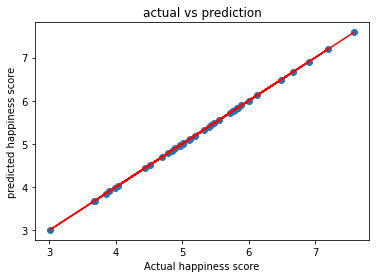

In [37]:
plt.scatter(y_test,y_pred)
m, c = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + c), color = 'r')
plt.xlabel('Actual happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual vs prediction')
plt.show()

In [38]:
print('Coefficient:', regression.score(x_train, y_train))
print('Intercept:', regression.intercept_)
print('Slope:', regression.coef_)

Coefficient: 0.9999999504662587
Intercept: 5.37572796510484
Slope: [-2.07564091e-05 -5.50074869e-05 -2.49450273e-04 -1.27625284e-05
  4.01787221e-01  2.71428697e-01  2.46207921e-01  1.50130463e-01
  1.19641075e-01  1.26294239e-01  5.51672356e-01]


In [39]:
# model evaluation techniques
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
y_pred = regression.predict(x_test)

In [41]:
mean_absolute_error(y_test,y_pred)

0.0002564371003957011

In [42]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002969485811335146

In [46]:
#Regularization with lasso
from sklearn.linear_model import LassoCV,Lasso

In [47]:
lasscv = LassoCV(alphas = None,max_iter=1000, normalize=True)

In [48]:
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [49]:
#learning rate
alpha = lasscv.alpha_
alpha

0.00010842877463530164

In [50]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010842877463530164)

In [216]:
linearlasso=lasso_reg.score(x_test,y_test)

In [219]:
linearlasso*100

99.99990862234519

# Random forest regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [54]:
y_pred = rf.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred)*100)

R square score 99.92448333630423


In [130]:
y_test_pred = rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 99.44762843618423


# Hyperparameter tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid_params={'max_depth': [80, 90, 100, 110],
             'min_samples_split': [8, 10, 12],
             'n_estimators': [100, 200, 300, 1000]}

In [92]:
grd_src15=GridSearchCV(rf,param_grid=grid_params,cv=3)
grd_src15.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [94]:
grd_src15.best_estimator_

RandomForestRegressor(max_depth=100, min_samples_split=8)

In [136]:
rfr=  RandomForestRegressor(max_depth=100, min_samples_split=8)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
99.23841857649214


#  Adaboost Model training

In [57]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train,y_train)



AdaBoostRegressor()

In [58]:
y_pred = ada.predict(x_train)

In [59]:
print("R square score",metrics.r2_score(y_train,y_pred))

R square score 0.997897028391568


In [60]:
y_test_pred = ada.predict(x_test)

In [61]:
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 99.07994255170959


# hyperparameter tuning with Randomized cv

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor


In [63]:
dt=DecisionTreeRegressor()


In [165]:
params={'n_estimators':[40,47,49,50,100,200],
        'learning_rate':[0.001,0.005,0.003],
        'loss':['linear', 'square', 'exponential']}


In [166]:
rnd_src= RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [167]:
rnd_src.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.005, 0.003],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [40, 47, 49, 50, 100,
                                                         200]})

In [168]:
rnd_src.best_estimator_

AdaBoostRegressor(learning_rate=0.005, loss='square', n_estimators=200)

In [169]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.005,n_estimators=200,loss='square')
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
99.48189553385829


# Gradient boosting regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)


GradientBoostingRegressor()

In [71]:
y_pred = gbr.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred))

R square score 0.9999989891361116


In [96]:
y_test_pred = gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 99.58881337130441


# hyperparameter tuning with Gridsearch cv

In [81]:
from sklearn.model_selection import GridSearchCV

In [161]:
grid_params={'max_depth':range(4,12,2),
        'learning_rate':np.arange(0.001,0.005,0.003),
            'min_samples_split':range(4,8,2),
             'max_features':('auto', 'sqrt', 'log2'),
             'loss':('ls', 'lad', 'huber', 'quantile')}


In [162]:
grd_src=GridSearchCV(gbr,param_grid=grid_params)
grd_src.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.001, 0.004]),
                         'loss': ('ls', 'lad', 'huber', 'quantile'),
                         'max_depth': range(4, 12, 2),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': range(4, 8, 2)})

In [163]:
grd_src.best_estimator_

GradientBoostingRegressor(learning_rate=0.004, max_depth=10,
                          max_features='auto', min_samples_split=4)

In [164]:
grdr = GradientBoostingRegressor(learning_rate=0.004, max_depth=10,min_samples_split=4,max_features='auto')
grdr.fit(x_train,y_train)
y_pred = grdr.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
52.52414298288619


In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
grid_params={'max_depth':range(4,12,2),
        'learning_rate':np.arange(0.001,0.005,0.003),
            'min_samples_split':range(4,8,2)}


In [75]:
rnd_src11= RandomizedSearchCV(GradientBoostingRegressor(),cv=5,param_distributions=grid_params)

In [76]:
rnd_src11.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.001, 0.004]),
                                        'max_depth': range(4, 12, 2),
                                        'min_samples_split': range(4, 8, 2)})

In [77]:
rnd_src11.best_estimator_

GradientBoostingRegressor(learning_rate=0.004, max_depth=6, min_samples_split=4)

In [146]:
grd1 = GradientBoostingRegressor(learning_rate=0.004, max_depth=6,min_samples_split=4)
grd1.fit(x_train,y_train)
y_pred = grd1.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
52.56073491320426


# xgb model 

In [119]:
from xgboost import XGBRegressor
#import xgboost as xgb
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
#(objective = 'reg:squarederror', n_estimators = 100, max_depth = 3, learning_rate = 0.1)

In [107]:
y_pred = xgb.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred)*100)

R square score 99.99996266132798


In [108]:
y_test_pred = xgb.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 99.04938892874974


# hyper parameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [184]:
grid_params={'learning_rate':[0.05,0.0001,0.000002,0.15,0.25,0.30],
             'max_depth':[3,4,5,6,8,10,12,15],
             'min_child_weight':[1,3,5,7],
            'colsample_bytree':[0.3,0.4,0.5,0.7]}
             

In [187]:
xgb_src11= GridSearchCV(xgb,cv=5,param_grid=grid_params,n_jobs=-1,verbose=3)

In [188]:
xgb_src11.fit(x_train,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 1520 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 2224 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  2.0min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [189]:
xgb_src11.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
xgb_src11.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 1}

In [199]:
xgbr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
98.05957335974821


# cross validation 

In [126]:
from sklearn.model_selection import cross_val_score

In [206]:
scr=cross_val_score(regression,x,y,cv=5)
print("cross validation for linear regression is",scr.mean()*100)

cross validation for linear regression is 99.99982417917262


In [207]:
scr=cross_val_score(rfr,x,y,cv=5)
print("cross validation for random forest regressor is",scr.mean()*100)

cross validation for random forest regressor is -201.67965650763153


In [208]:
scr=cross_val_score(xgbr,x,y,cv=10)
print("cross validation for xgboost regressor is",scr.mean()*100)

cross validation for xgboost regressor is -203.25788723182058


In [209]:
scr=cross_val_score(ada,x,y,cv=5)
print("cross validation for Ada boost regressor is",scr.mean()*100)

cross validation for Ada boost regressor is -152.01450073648382


#### saving the model

In [221]:
import joblib
joblib.dump(regression,'happinessmodel.pkl')

['happinessmodel.pkl']

##### Loading the model

In [222]:
model =joblib.load('happinessmodel.pkl')

In [224]:
prediction =model.predict(x_test)

In [226]:
prediction =pd.DataFrame(prediction)

In [ ]:
prediction.to_csv('Results.csv',index=False)